## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
MONITOR = ["val_loss", "val_acc"]
PATIENCE = [5, 10, 25]

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
from keras.callbacks import EarlyStopping

for moni in MONITOR:
    for pt in PATIENCE:
        
        earlystop = EarlyStopping(monitor=moni,
                                  patience=pt,
                                  verbose=1
                                  )
        
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train,
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[earlystop]
                  )

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
            
        exp_name_tag = "exp-monitor-%s-patience-%s" % (str(moni), str(pt))
            
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

Epoch 9/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.3220 - acc: 0.5374 - val_loss: 1.5073 - val_acc: 0.4699
Epoch 10/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.2922 - acc: 0.5499 - val_loss: 1.4983 - val_acc: 0.4688
Epoch 11/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.2644 - acc: 0.5599 - val_loss: 1.4903 - val_acc: 0.4772
Epoch 12/50
50000/50000 [==============================] - 20s 405us/step - loss: 1.2362 - acc: 0.5704 - val_loss: 1.4805 - val_acc: 0.4766
Epoch 13/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.2117 - acc: 0.5787 - val_loss: 1.4690 - val_acc: 0.4819
Epoch 14/50
50000/50000 [==============================] - 19s 379us/step - loss: 1.1872 - acc: 0.5889 - val_loss: 1.4763 - val_acc: 0.4790
Epoch 15/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.1640 - acc: 0.5971 - val_loss: 1.4571 - val_acc: 0.4873
Epoch 16/50
50000/500

50000/50000 [==============================] - 11s 216us/step - loss: 0.9152 - acc: 0.6969 - val_loss: 1.4711 - val_acc: 0.4975
Epoch 28/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.8959 - acc: 0.7032 - val_loss: 1.4773 - val_acc: 0.4964
Epoch 29/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.8767 - acc: 0.7099 - val_loss: 1.4953 - val_acc: 0.4970
Epoch 30/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.8547 - acc: 0.7181 - val_loss: 1.4907 - val_acc: 0.4994
Epoch 31/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.8342 - acc: 0.7278 - val_loss: 1.4920 - val_acc: 0.4999
Epoch 32/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.8155 - acc: 0.7347 - val_loss: 1.5209 - val_acc: 0.4945
Epoch 33/50
50000/50000 [==============================] - 11s 219us/step - loss: 0.7962 - acc: 0.7443 - val_loss: 1.5125 - val_acc: 0.4984
Epoch 34/50
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 249us/step - loss: 2.1955 - acc: 0.2702 - val_loss: 2.1601 - val_acc: 0.3094
Epoch 2/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.7468 - acc: 0.3901 - val_loss: 1.8437 - val_acc: 0.3772
Epoch 3/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.6196 - acc: 0.4326 - val_loss: 1.7116 - val_acc: 0.4026
Epoch 4/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.5462 - acc: 0.4585 - val_loss: 1.6352 - val_acc: 0.4301
Epoch 5/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.4906 - acc: 0.4791 - val_loss: 1.6234 - val_acc: 0.4368
Epoch 6/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.4451 - acc: 0.4945 - val_loss: 1.5862 - val_acc: 0.4453
Epoch 7/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.4066 - acc: 0.5078 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 250us/step - loss: 2.1804 - acc: 0.2779 - val_loss: 2.2037 - val_acc: 0.3019
Epoch 2/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.7388 - acc: 0.3934 - val_loss: 1.8000 - val_acc: 0.3849
Epoch 3/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.6173 - acc: 0.4327 - val_loss: 1.7043 - val_acc: 0.4125
Epoch 4/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.5436 - acc: 0.4582 - val_loss: 1.6176 - val_acc: 0.4337
Epoch 5/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.4860 - acc: 0.4786 - val_loss: 1.5913 - val_acc: 0.4444
Epoch 6/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.4406 - acc: 0.4942 - val_loss: 1.5537 - val_acc: 0.4566
Epoch 7/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.4003 - acc: 0.5112 - val_loss: 1.

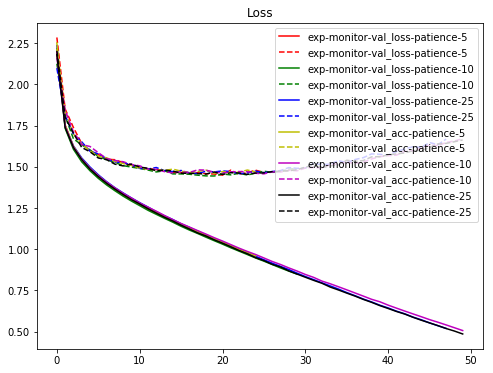

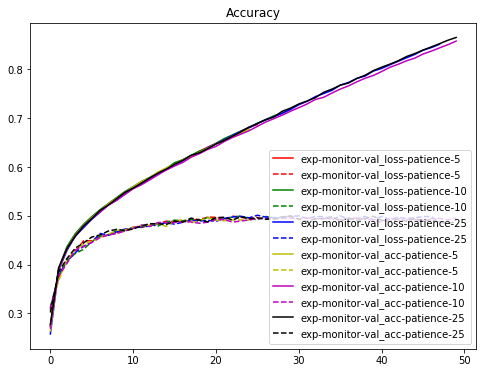

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()